In [2]:
import os

## Download audio from youtube videos

In [11]:
link = 'youtu.be/8uI9H5jGRV8?start=30&end=40'
path = '/mnt/datadrive1/h216520/fastai_v3/data/'

In [50]:
ydl_opts = {'format': 'bestaudio/best',
            'postprocessors': [{'key': 'FFmpegExtractAudio','preferredcodec': 'wav','preferredquality': '192'}]}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['http://www.youtube.com/watch?v=-0mjrMposBM'])

[youtube] -0mjrMposBM: Downloading webpage
[youtube] -0mjrMposBM: Downloading video info webpage


[download] Destination: A Railroad Frozen in Time - Jack Burgess' Yosemite Valley Railway Revisited--0mjrMposBM.m4a
[download] 100% of 14.24MiB in 00:0628MiB/s ETA 00:005


ERROR: ffprobe or avprobe not found. Please install one.


DownloadError: ERROR: ffprobe or avprobe not found. Please install one.

## Converting audio to waveform

In [ ]:
command = "ffmpeg -ss 30 -t 10 -i Final Fantasy 9 - Excalibur 2 run tricks -Ice Cavern--5DdYkYOjy0.wav Final Fantasy 9 - Excalibur 2 run tricks -Ice Cavern--5DdYkYOjy0.wav"
subprocess.call(command, shell=True)

## Converting wav file to img

/mnt/datadrive1/anaconda3/envs/fastai_v3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


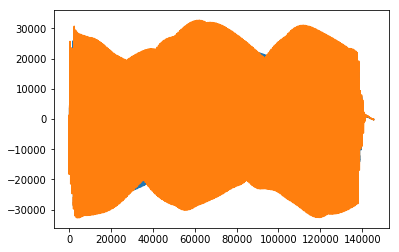

In [41]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
rate, data = wav.read('/mnt/datadrive1/h216520/fastai_v3/data/Yamaha-V50-Synbass-1-C2.wav')
%matplotlib inline
plt.plot(data)
plt.show()

## Name to id mapping

In [57]:
x = pd.read_json('./audio_classes.json')#, name = ['id','name','description','citation_uri','positive_examples','child_ids','restrictions'])

In [60]:
x.head();x.shape;x.columns

,child_ids,citation_uri,description,id,name,positive_examples,restrictions
0,"[/m/09l8g, /m/01w250, /m/09hlz4, /m/0bpl036, /...",,Sounds produced by the human body through the ...,/m/0dgw9r,Human sounds,[],[abstract]
1,"[/m/09x0r, /m/07p6fty, /m/03qc9zr, /m/02rtxlg,...",http://en.wikipedia.org/wiki/Human_voice,The human voice consists of sound made by a hu...,/m/09l8g,Human voice,[],[abstract]
2,"[/m/05zppz, /m/02zsn, /m/0ytgt, /m/01h8n0, /m/...",http://en.wikipedia.org/wiki/Speech,Speech is the vocalized form of human communic...,/m/09x0r,Speech,"[youtu.be/8uI9H5jGRV8?start=30&end=40, youtu.b...",[]
3,[],,Speech uttered by an adult male human.,/m/05zppz,"Male speech, man speaking","[youtu.be/6niRPYpLOpQ?start=30&end=40, youtu.b...",[]
4,[],,Speech uttered by an adult female human.,/m/02zsn,"Female speech, woman speaking","[youtu.be/4l05nCOnIRg?start=30&end=40, youtu.b...",[]


(632, 7)

Index(['child_ids', 'citation_uri', 'description', 'id', 'name',
       'positive_examples', 'restrictions'],
      dtype='object')

In [101]:
x[['id','name','description','child_ids','restrictions']].to_csv('audioset_id_mapping.csv')

In [100]:
os.getcwd()

'/mnt/datadrive1/h216520/fastai_v3'

## audioset filtering using annotation csv

In [143]:
import glob
df = pd.DataFrame()
for cnt, i in enumerate(glob.glob('/mnt/datadrive1/h216520/fastai_v3/*_segments.csv')):
    print(cnt, i)
    if cnt==0:
        x = pd.read_csv(i,# nrows=1000,
                        sep=',', skiprows=2,quotechar='"', engine='python', skipinitialspace=True)
        df = x
    else:
        x = pd.read_csv(i, #nrows=1000,
                        sep=',', skiprows=2,quotechar='"', engine='python', skipinitialspace=True)
        df = df.append(x, ignore_index=True)

0 /mnt/datadrive1/h216520/fastai_v3/balanced_train_segments.csv
1 /mnt/datadrive1/h216520/fastai_v3/unbalanced_train_segments.csv
2 /mnt/datadrive1/h216520/fastai_v3/eval_segments.csv


In [145]:
df.head()

,# YTID,start_seconds,end_seconds,positive_labels
0,--PJHxphWEs,30.0,40.0,"/m/09x0r,/t/dd00088"
1,--ZhevVpy1s,50.0,60.0,/m/012xff
2,--aE2O5G5WE,0.0,10.0,"/m/03fwl,/m/04rlf,/m/09x0r"
3,--aO5cdqSAg,30.0,40.0,"/t/dd00003,/t/dd00005"
4,--aaILOrkII,200.0,210.0,"/m/032s66,/m/073cg4"


In [147]:
df['type'] = df.positive_labels.map(lambda x: 'classification' if len(x.split(','))==1 else 'multi')

In [148]:
df.type.value_counts()

multi             1183535
classification     900785
Name: type, dtype: int64

In [149]:
c2code_map = {'Bark':'/m/05tny_', 'Meow':'/m/07qrkrw'}

In [156]:
# bark
df['Bark']= df.positive_labels.map(lambda x: 1 if (c2code_map['Bark'] in x.split(',')) else 0)
df[df.Bark==1].type.value_counts()
# Meow
df['Meow']= df.positive_labels.map(lambda x: 1 if (c2code_map['Meow'] in x.split(',')) else 0)
df[df.Meow==1].type.value_counts()

multi             2545
classification      87
Name: type, dtype: int64

multi             1866
classification      95
Name: type, dtype: int64

## Spectrogram graph

In [5]:
import librosa
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
for cnt,i in enumerate(['8JgqLELdUkY','0ES5i4nwdGk','0G-Qx3Gv01s','8TWtLCjUI5I','1x0J9Z8et6g','4VaeY4QGvOQ','6JyHw_Clffw','Bo4LcZjitzU']):
    X,sr = librosa.load('/mnt/datadrive1/h216520/fastai_v3/data/google_audioset/google_audioset_Bark_Meow/' + i+'.wav')
    c = [10,9,8,7,4,3,2,1]
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    Pxx, freqs, bins, im = plt.specgram(np.array(X), Fs=22050)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    filename  = '/mnt/datadrive1/h216520/fastai_v3/data/google_audioset/'+i+str(c[cnt])+'.png'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close('all')

In [49]:
import pandas as pd
pd.read_json('/mnt/datadrive1/h216520/fastai_v3/data/google_audioset/audio_classes.json')

,child_ids,citation_uri,description,id,name,positive_examples,restrictions
0,"[/m/09l8g, /m/01w250, /m/09hlz4, /m/0bpl036, /...",,Sounds produced by the human body through the ...,/m/0dgw9r,Human sounds,[],[abstract]
1,"[/m/09x0r, /m/07p6fty, /m/03qc9zr, /m/02rtxlg,...",http://en.wikipedia.org/wiki/Human_voice,The human voice consists of sound made by a hu...,/m/09l8g,Human voice,[],[abstract]
2,"[/m/05zppz, /m/02zsn, /m/0ytgt, /m/01h8n0, /m/...",http://en.wikipedia.org/wiki/Speech,Speech is the vocalized form of human communic...,/m/09x0r,Speech,"[youtu.be/8uI9H5jGRV8?start=30&end=40, youtu.b...",[]
3,[],,Speech uttered by an adult male human.,/m/05zppz,"Male speech, man speaking","[youtu.be/6niRPYpLOpQ?start=30&end=40, youtu.b...",[]
4,[],,Speech uttered by an adult female human.,/m/02zsn,"Female speech, woman speaking","[youtu.be/4l05nCOnIRg?start=30&end=40, youtu.b...",[]
5,[],,"Speech uttered by a human child, i.e. a human ...",/m/0ytgt,"Child speech, kid speaking","[youtu.be/iPIGoScYduI?start=210&end=220, youtu...",[]
6,[],http://en.wikipedia.org/wiki/Conversation,"Interactive, spontaneous spoken communication ...",/m/01h8n0,Conversation,"[youtu.be/4FQxw_49xAk?start=30&end=40, youtu.b...",[]
7,[],http://en.wikipedia.org/wiki/Narration,Speech by a single human aimed at an audience ...,/m/02qldy,"Narration, monologue","[youtu.be/8maPz8qrmnM?start=30&end=40, youtu.b...",[]
8,[],http://en.wikipedia.org/wiki/Babbling,Speech-like sounds uttered by a human that lac...,/m/0261r1,Babbling,"[youtu.be/ZR48r_8OhUI?start=50&end=60, youtu.b...",[]
9,[],http://en.wikipedia.org/wiki/Speech_synthesis,Artificially-produced human speech.,/m/0brhx,Speech synthesizer,"[youtu.be/Y1ywO5WfUqE?start=90&end=100, youtu....",[]


In [51]:
from fastai import *
from fastai.vision import *

In [57]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', test:Union[pathlib.Path, str, NoneType]=None, valid_pct=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).

